In [1]:
# Packages
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import torch.optim as optim
import matplotlib.pyplot as plt
import time

In [2]:
#Input data
data=np.load("/Users/gardasnagarjun/Downloads/datasets/bi-class/wine.npz", mmap_mode='r')
X_train=data['train_X'].astype('float32')
train_Y=data['train_Y'].astype('long')
X_test,test_Y=data['test_X'].astype('float32'),data['test_Y'].astype('long')
X_train

array([[1.225e+01, 1.730e+00, 2.120e+00, ..., 1.000e+00, 3.170e+00,
        5.100e+02],
       [1.475e+01, 1.730e+00, 2.390e+00, ..., 1.250e+00, 2.730e+00,
        1.150e+03],
       [1.200e+01, 1.510e+00, 2.420e+00, ..., 1.050e+00, 2.650e+00,
        4.500e+02],
       ...,
       [1.267e+01, 9.800e-01, 2.240e+00, ..., 1.230e+00, 3.160e+00,
        4.500e+02],
       [1.311e+01, 1.010e+00, 1.700e+00, ..., 1.120e+00, 3.180e+00,
        5.020e+02],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03]], dtype=float32)

In [3]:
train_Y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [4]:
# training dataset is split into train, validation dataset
train_X,val_X,train_y,val_Y=train_test_split(X_train,train_Y,test_size=0.2)

print(len(train_X))
print(len(val_X))

113
29


In [5]:
#checking the shape
print(train_X.shape,val_X.shape,train_y.shape,val_Y.shape)
print(len(X_train))

(113, 13) (29, 13) (113,) (29,)
142


In [6]:
#Construct main,train,validation and test datasets for torch.util.data.dataloader:

main_data=[]
for i in range(len(X_train)):
    X_train.astype('float32')
    train_Y.astype('long')
    main_data.append([X_train[i],train_Y[i]])
    
mainloader=torch.utils.data.DataLoader(main_data,shuffle=True,batch_size=1)
i4,l4=next(iter(mainloader))
print(i4.shape)

train_data = []
for i in range(len(train_X)):
    train_X.astype('float32')
    train_y.astype('long')
    train_data.append([train_X[i], train_y[i]])

trainloader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=2)
i1, l1 = next(iter(trainloader))
print(i1.shape)

val_data=[]
for i in range(len(val_X)):
    val_X.astype('float32')
    val_Y.astype('long')
    val_data.append([val_X[i], val_Y[i]])

valloader = torch.utils.data.DataLoader(val_data, shuffle=False, batch_size=1)
i2, l2 = next(iter(valloader))
print(i2.shape)


test_data=[]
for i in range(len(X_test)):
    X_test.astype('float32')
    test_Y.astype('long')
    test_data.append([X_test[i],test_Y[i]])
    
testloader=torch.utils.data.DataLoader(test_data,shuffle=False)

i3,l3=next(iter(testloader))
print(i3.shape)

torch.Size([1, 13])
torch.Size([2, 13])
torch.Size([1, 13])
torch.Size([1, 13])


In [7]:
print(len(mainloader))
print(len(trainloader))
print(len(valloader))
print(len(testloader))
for i,j in enumerate(valloader):
    print(i,j)
    break

142
57
29
36
0 [tensor([[1.2720e+01, 1.8100e+00, 2.2000e+00, 1.8800e+01, 8.6000e+01, 2.2000e+00,
         2.5300e+00, 2.6000e-01, 1.7700e+00, 3.9000e+00, 1.1600e+00, 3.1400e+00,
         7.1400e+02]]), tensor([1])]


In [8]:

#Define the model of your Neural Network:
class One_hidden(nn.Module):
    def __init__(self,n_hidden,n_output=2,n_feature=13):
        super(One_hidden,self).__init__()
        self.hidden=nn.Linear(n_feature,n_hidden)
        self.output=nn.Linear(n_hidden,n_output)

        
    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=self.output(x)
        
        return x



In [9]:
# to check whether the model is defined or not
net_10=One_hidden(10)
print(net_10)

One_hidden(
  (hidden): Linear(in_features=13, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=2, bias=True)
)


In [10]:
# Train the model
# step parameter is used to train the model
# loss is generated along with step size defined
def train_with_steps(net,trainloader):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
    #torch.manual_seed(0)
    n_total_steps = len(trainloader)
    num_epochs=20
    
    for epoch in range(num_epochs):
        for i,(x,y) in enumerate(trainloader):
            net.zero_grad()
            
            # Forward pass    
            output = net(x)
            loss = criterion(output, y)
        
        
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            
            if (i+1) % n_total_steps == 0:
                print (f'Epoch [{epoch+1}/{num_epochs}],Step:[{i+1}/{n_total_steps}], Loss: {loss.item():.5f}')
                
    acc=accuracy(net,valloader)
    return acc
            
 #Calculate Accuracy:      
def accuracy(net,valloader):
    net.eval()
    with torch.no_grad():
        n_correct=0
        n_samples=0
        for x,y in valloader:
            output=net(x)
            _,predicted=torch.max(output.data,1)
            n_samples+=y.size(0)
            n_correct+=(predicted==y).sum().item()
            
        acc=100.0* n_correct/n_samples
        print(f'Accuracy of the network for val data: {acc} %')
        return acc

In [11]:
def accuracy_test(net,testloader):
    with torch.no_grad():
        net.eval()
        n_correct = 0
        n_samples = 0
        for z, y in testloader:
            outputs = net(z)
            # max returns (value ,index)
            _, predicted = torch.max(outputs.data, 1)
            n_samples += y.size(0)
            n_correct += (predicted == y).sum().item()
            
        acc = 100.0 * n_correct / n_samples
        print(f'Accuracy of the network for test data: {acc} %')

In [ ]:
n_hidden=(i for i in range(1,11))
storage=dict()

for i in n_hidden:
    net=One_hidden(i)
    storage[i]=train_with_steps(net,trainloader)

print(storage)

In [ ]:
net_best=One_hidden(9)

In [ ]:
train_with_steps(net_best,mainloader)

In [ ]:
accuracy_test(net_best,testloader)

In [12]:
# Model is trained over average loss per epoch:

def model_train(net,trainloader):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
    # number of epochs to train the model
    n_epochs = 30  # suggest training between 20-50 epochs
    loss_values=[]

    for epoch in range(n_epochs):
    # monitor training loss
        train_loss = 0.0
    
    ###################
    # train the model #
    ###################
        for data, target in trainloader:
        # clear the gradients of all optimized variables
            optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
            output = net(data)
        # calculate the loss
            loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
        # perform a single optimization step (parameter update)
            optimizer.step()
        # update running training loss
            train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
        train_loss = train_loss/len(trainloader.dataset)
        loss_values.append(train_loss)

        print('Epoch: {} \tTraining Loss: {:.6f}'.format(
            epoch+1, 
            train_loss
            ))
    plt.plot(loss_values)
    acc=accuracy(net,valloader)
    return acc

In [ ]:
model_train(net_best,trainloader)

Epoch: 1 	Training Loss: 0.941922
Epoch: 2 	Training Loss: 0.771126
Epoch: 3 	Training Loss: 0.750215
Epoch: 4 	Training Loss: 0.731206
Epoch: 5 	Training Loss: 0.734654
Epoch: 6 	Training Loss: 0.703535
Epoch: 7 	Training Loss: 0.703398
Epoch: 8 	Training Loss: 0.687052
Epoch: 9 	Training Loss: 0.677154
Epoch: 10 	Training Loss: 0.658161
Epoch: 11 	Training Loss: 0.648359
Epoch: 12 	Training Loss: 0.638783
Epoch: 13 	Training Loss: 0.624172
Epoch: 14 	Training Loss: 0.634528
Epoch: 15 	Training Loss: 0.606378
Epoch: 16 	Training Loss: 0.593950
Epoch: 17 	Training Loss: 0.592581
Epoch: 18 	Training Loss: 0.586486
Epoch: 19 	Training Loss: 0.590485
Epoch: 20 	Training Loss: 0.565554
Epoch: 21 	Training Loss: 0.566561
Epoch: 22 	Training Loss: 0.560965
Epoch: 23 	Training Loss: 0.562710
Epoch: 24 	Training Loss: 0.541115
Epoch: 25 	Training Loss: 0.562856
Epoch: 26 	Training Loss: 0.547290
Epoch: 27 	Training Loss: 0.526144
Epoch: 28 	Training Loss: 0.532924
Epoch: 29 	Training Loss: 0.5

Epoch: 22 	Training Loss: 0.316107
Epoch: 23 	Training Loss: 0.361811
Epoch: 24 	Training Loss: 0.289141
Epoch: 25 	Training Loss: 0.313200
Epoch: 26 	Training Loss: 0.393034
Epoch: 27 	Training Loss: 0.319905
Epoch: 28 	Training Loss: 0.352040
Epoch: 29 	Training Loss: 0.271518
Epoch: 30 	Training Loss: 0.257488
Accuracy of the network for val data: 82.75862068965517 %
Epoch: 1 	Training Loss: 2.436196
Epoch: 2 	Training Loss: 0.533713
Epoch: 3 	Training Loss: 0.552405
Epoch: 4 	Training Loss: 0.595899
Epoch: 5 	Training Loss: 0.501958
Epoch: 6 	Training Loss: 0.466973
Epoch: 7 	Training Loss: 0.628571
Epoch: 8 	Training Loss: 0.479478
Epoch: 9 	Training Loss: 0.444321
Epoch: 10 	Training Loss: 0.389852
Epoch: 11 	Training Loss: 0.403230
Epoch: 12 	Training Loss: 0.421326
Epoch: 13 	Training Loss: 0.410196
Epoch: 14 	Training Loss: 0.397524
Epoch: 15 	Training Loss: 0.358941
Epoch: 16 	Training Loss: 0.325436
Epoch: 17 	Training Loss: 0.342222
Epoch: 18 	Training Loss: 0.338933
Epoch:

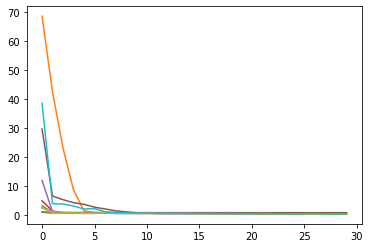

In [13]:
# to find the best hidden node, train and test the accuracies of such model, find the best one:

n_hidden=(i for i in range(1,11))
storage=dict()

for i in n_hidden:
    net=One_hidden(i)
    storage[i]=model_train(net,trainloader)
    
print(storage)

Epoch: 1 	Training Loss: 4.145105
Epoch: 2 	Training Loss: 0.534644
Epoch: 3 	Training Loss: 0.552931
Epoch: 4 	Training Loss: 0.690980
Epoch: 5 	Training Loss: 0.531536
Epoch: 6 	Training Loss: 0.421271
Epoch: 7 	Training Loss: 0.421889
Epoch: 8 	Training Loss: 0.461244
Epoch: 9 	Training Loss: 0.421176
Epoch: 10 	Training Loss: 0.401006
Epoch: 11 	Training Loss: 0.401577
Epoch: 12 	Training Loss: 0.380044
Epoch: 13 	Training Loss: 0.342821
Epoch: 14 	Training Loss: 0.357685
Epoch: 15 	Training Loss: 0.338827
Epoch: 16 	Training Loss: 0.323408
Epoch: 17 	Training Loss: 0.370263
Epoch: 18 	Training Loss: 0.304510
Epoch: 19 	Training Loss: 0.295227
Epoch: 20 	Training Loss: 0.299337
Epoch: 21 	Training Loss: 0.317901
Epoch: 22 	Training Loss: 0.269959
Epoch: 23 	Training Loss: 0.244064
Epoch: 24 	Training Loss: 0.269228
Epoch: 25 	Training Loss: 0.257134
Epoch: 26 	Training Loss: 0.286006
Epoch: 27 	Training Loss: 0.254148
Epoch: 28 	Training Loss: 0.253876
Epoch: 29 	Training Loss: 0.2

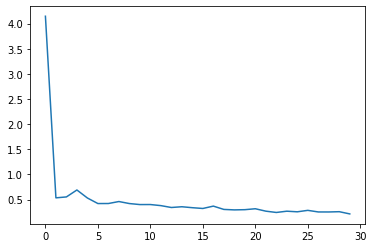

In [14]:
start_time_best=time.time()
model_best=One_hidden(7) # Best parameter
model_train(model_best,mainloader)
end_time_best=time.time()
print(f"Training time: {end_time_best-start_time_best}s") # Training time

In [15]:
accuracy_test(model_best,testloader) # Final accuracy

Accuracy of the network for test data: 77.77777777777777 %
